In [80]:
import pandas
from collections import defaultdict
import dateutil.parser
import itertools
import re
import datetime
import copy

In [3]:
#Challenge 1

#work out challenges one one set of weekly data
df160618 = pandas.read_csv('turnstile_160618.txt')

#['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES','EXITS']     

dict160618 = defaultdict(list)

for ind, row in df160618.iterrows():
    keys = tuple(row[0:4])
    dict160618[keys].append(row[4:].tolist())


In [6]:
#CHECK: Challenge 1
for k, v in dict160618.items() :
    print(k," : ", v)
    break


('N512', 'R163', '00-00-01', '14 ST')  :  [['FLM123', 'IND', '06/11/2016', '00:00:00', 'REGULAR', 1570298, 2889034], ['FLM123', 'IND', '06/11/2016', '04:00:00', 'REGULAR', 1570377, 2889077], ['FLM123', 'IND', '06/11/2016', '08:00:00', 'REGULAR', 1570385, 2889130], ['FLM123', 'IND', '06/11/2016', '12:00:00', 'REGULAR', 1570464, 2889370], ['FLM123', 'IND', '06/11/2016', '16:00:00', 'REGULAR', 1570687, 2889689], ['FLM123', 'IND', '06/11/2016', '20:00:00', 'REGULAR', 1570950, 2890001], ['FLM123', 'IND', '06/12/2016', '00:00:00', 'REGULAR', 1571149, 2890171], ['FLM123', 'IND', '06/12/2016', '04:00:00', 'REGULAR', 1571200, 2890255], ['FLM123', 'IND', '06/12/2016', '08:00:00', 'REGULAR', 1571222, 2890289], ['FLM123', 'IND', '06/12/2016', '12:00:00', 'REGULAR', 1571316, 2890462], ['FLM123', 'IND', '06/12/2016', '16:00:00', 'REGULAR', 1571504, 2890780], ['FLM123', 'IND', '06/12/2016', '20:00:00', 'REGULAR', 1571742, 2891037], ['FLM123', 'IND', '06/13/2016', '00:00:00', 'REGULAR', 1571870, 28911

In [10]:
#Challenge 2
dict160618byTime.clear()
#dict160618byTime= defaultdict(list)


for index, row in df160618.iterrows():
    
    dstr = row['DATE'] + ' ' + row['TIME']
    dt = dateutil.parser.parse(dstr)
    en = row.values[-2:].tolist()
    dict160618byTime[tuple(row[0:4])].append([dt]+en)

#adjust counts of entries and extits
    
    

In [152]:
#CHECK: Challenge 2
for k, v in dict160618byTime.items() :
    print(k," : ", v)
    break


('N512', 'R163', '00-00-01', '14 ST')  :  [[datetime.datetime(2016, 6, 11, 0, 0), 1570298, 2889034], [datetime.datetime(2016, 6, 11, 4, 0), 1570377, 2889077], [datetime.datetime(2016, 6, 11, 8, 0), 1570385, 2889130], [datetime.datetime(2016, 6, 11, 12, 0), 1570464, 2889370], [datetime.datetime(2016, 6, 11, 16, 0), 1570687, 2889689], [datetime.datetime(2016, 6, 11, 20, 0), 1570950, 2890001], [datetime.datetime(2016, 6, 12, 0, 0), 1571149, 2890171], [datetime.datetime(2016, 6, 12, 4, 0), 1571200, 2890255], [datetime.datetime(2016, 6, 12, 8, 0), 1571222, 2890289], [datetime.datetime(2016, 6, 12, 12, 0), 1571316, 2890462], [datetime.datetime(2016, 6, 12, 16, 0), 1571504, 2890780], [datetime.datetime(2016, 6, 12, 20, 0), 1571742, 2891037], [datetime.datetime(2016, 6, 13, 0, 0), 1571870, 2891134], [datetime.datetime(2016, 6, 13, 4, 0), 1571885, 2891142], [datetime.datetime(2016, 6, 13, 8, 0), 1571924, 2891295], [datetime.datetime(2016, 6, 13, 12, 0), 1572042, 2891786], [datetime.datetime(201

In [48]:
#Challenge 3
#I throw out 0 base(beginner) counts
dict160618TimeCounts.clear()
dict160618TimeCounts= defaultdict(list)

for k,v in dict160618byTime.items():
    for i in range(1,len(v)):
        val = v[i].copy()
        val[-1] = max(v[i][-1] - v[i-1][-1],0)
        val[-2] = max(v[i][-2] - v[i-1][-2],0)
        dict160618TimeCounts[k].append(val)
        
    

In [153]:
#CHECK: Challenge 3
for k, v in dict160618TimeCounts.items() :
    print(k," : ", v)
    break


('N512', 'R163', '00-00-01', '14 ST')  :  [[datetime.datetime(2016, 6, 11, 4, 0), 79, 43], [datetime.datetime(2016, 6, 11, 8, 0), 8, 53], [datetime.datetime(2016, 6, 11, 12, 0), 79, 240], [datetime.datetime(2016, 6, 11, 16, 0), 223, 319], [datetime.datetime(2016, 6, 11, 20, 0), 263, 312], [datetime.datetime(2016, 6, 12, 0, 0), 199, 170], [datetime.datetime(2016, 6, 12, 4, 0), 51, 84], [datetime.datetime(2016, 6, 12, 8, 0), 22, 34], [datetime.datetime(2016, 6, 12, 12, 0), 94, 173], [datetime.datetime(2016, 6, 12, 16, 0), 188, 318], [datetime.datetime(2016, 6, 12, 20, 0), 238, 257], [datetime.datetime(2016, 6, 13, 0, 0), 128, 97], [datetime.datetime(2016, 6, 13, 4, 0), 15, 8], [datetime.datetime(2016, 6, 13, 8, 0), 39, 153], [datetime.datetime(2016, 6, 13, 12, 0), 118, 491], [datetime.datetime(2016, 6, 13, 16, 0), 186, 372], [datetime.datetime(2016, 6, 13, 20, 0), 330, 747], [datetime.datetime(2016, 6, 14, 0, 0), 273, 152], [datetime.datetime(2016, 6, 14, 4, 0), 30, 25], [datetime.dateti

In [50]:
#challenge 3
#dict160618TimeCounts
#dict160618DayTotals.clear()
dict160618DayTotals= defaultdict(list)

for k,v in dict160618TimeCounts.items():
    
    #a list of lists grouped by day
    daily_entries= [list(val[1]) for val in groupby(list(v), lambda x: x[0].day)]
    
    #creating dictionary entry for k key, iterationg over different days
    for dayrec in daily_entries:
        date = dayrec[0][0].date()
        exits = sum([x[-1] for x in dayrec])
        entries = sum([x[-2] for x in dayrec])
        dict160618DayTotals[k].append([date,entries,exits])
    

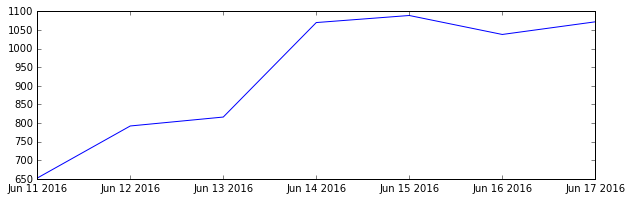

In [52]:
#Challenge 4
#drop exits from the dataset
import matplotlib.pyplot as plt

%matplotlib inline
#dict160618TimeSeries.clear()
dict160618TimeSeries=defaultdict(list)

for k,v in dict160618DayTotals.items():
    dates = []
    entries = []
    for dayrec in v:
        dates = dates + [dayrec[0]]
        entries = entries + [dayrec[1]]
    dict160618TimeSeries[k] = [dates, entries]
    
fig = plt.figure(figsize=(10,3))
name = ('N512', 'R163', '00-00-01', '14 ST')
plt.plot(dict160618TimeSeries[name][0],dict160618TimeSeries[name][1])


In [139]:
#Challenge 5 - sum accross SCP
dictAcrossSCP.clear()
newdict.clear()
dictAcrossSCP = defaultdict(list)
newdict = defaultdict(list)

#create new dictionary with key entries that aggregate data accross ('C/A', 'UNIT', STATION)
for k,v in dict160618DayTotals.items():
    newdict[tuple([k[0],k[1],k[3]])].extend(v)

for k,v in newdict.items():
    
    #sort dictionary values by date(prepare to use groupby())
    sortedlist = sorted(v, key = lambda x: x[0])
    #groupby the date, sum up accross dates
    for i,g in itertools.groupby(sortedlist, key = lambda x: x[0].day):
        dayrec = list(g)
        date = dayrec[0][0]
        entries = sum([x[1] for x in dayrec])
        exits = sum([x[2] for x in dayrec])
        dictAcrossSCP[k].append([date, entries, exits])

In [140]:
#CHECK: Challenge 5
for k,v in dictAcrossSCP.items():
    print(k, " : ", v)
    break
    

('N340', 'R115', '169 ST')  :  [[datetime.date(2016, 6, 11), 1699, 1575], [datetime.date(2016, 6, 12), 1491, 1634], [datetime.date(2016, 6, 13), 3307, 3695], [datetime.date(2016, 6, 14), 3079, 3711], [datetime.date(2016, 6, 15), 3245, 3736], [datetime.date(2016, 6, 16), 2919, 3625], [datetime.date(2016, 6, 17), 3013, 3570]]


In [154]:
#Challenge 6 - sum accross stations
#dictAcrossStations.clear()
newdict.clear()
dictAcrossStations = defaultdict(list)
newdict = defaultdict(list)

#create new dictionary with key entries that aggregate data accross ('C/A', 'UNIT', STATION)
for k,v in dictAcrossSCP.items():
    newdict[k[-1]].extend(v)
    
for k,v in newdict.items():
    
    #sort dictionary values by date(prepare to use groupby())
    sortedlist = sorted(v, key = lambda x: x[0])
    #groupby the date, sum up accross dates
    for i,g in itertools.groupby(sortedlist, key = lambda x: x[0].day):
        dayrec = list(g)
        date = dayrec[0][0]
        entries = sum([x[1] for x in dayrec])
        exits = sum([x[2] for x in dayrec])
        dictAcrossStations[k].append([date, entries, exits])


In [155]:
#CHECK: Challenge 6
for k,v in dictAcrossStations.items():
    print(k, " : ", v)
    break
    

AQUEDUCT RACETR  :  [[datetime.date(2016, 6, 11), 1947, 225], [datetime.date(2016, 6, 12), 2576, 203], [datetime.date(2016, 6, 13), 1762, 124], [datetime.date(2016, 6, 14), 1559, 144], [datetime.date(2016, 6, 15), 1815, 195], [datetime.date(2016, 6, 16), 1581, 142], [datetime.date(2016, 6, 17), 2007, 220]]


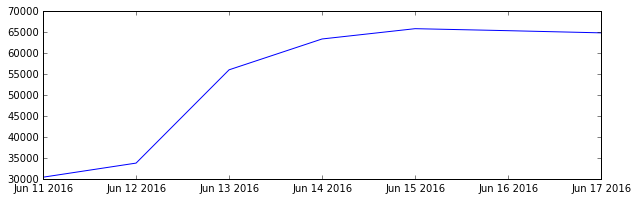

In [159]:
#Challenge 7
%matplotlib inline

fig = plt.figure(figsize=(10,3))
name = '14 ST'
dates = [v[0] for v in dictAcrossStations[name]]
counts = [v[1] for v in dictAcrossStations[name]]
plt.plot(dates,counts)


In [149]:
for k,v in  dictAcrossStations.items():
    print(k, " : ", v)
    break
    

AQUEDUCT RACETR  :  [[datetime.date(2016, 6, 11), 1947, 225], [datetime.date(2016, 6, 12), 2576, 203], [datetime.date(2016, 6, 13), 1762, 124], [datetime.date(2016, 6, 14), 1559, 144], [datetime.date(2016, 6, 15), 1815, 195], [datetime.date(2016, 6, 16), 1581, 142], [datetime.date(2016, 6, 17), 2007, 220], [datetime.date(2016, 6, 11), 1947, 225], [datetime.date(2016, 6, 12), 2576, 203], [datetime.date(2016, 6, 13), 1762, 124], [datetime.date(2016, 6, 14), 1559, 144], [datetime.date(2016, 6, 15), 1815, 195], [datetime.date(2016, 6, 16), 1581, 142], [datetime.date(2016, 6, 17), 2007, 220]]
